In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

sns.set()
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# !ls ../downloads/data

df_port3 = pd.read_csv("../downloads/data/estaticos_portfolio3.csv", index_col = 0)
df_mkt = pd.read_csv("../downloads/data/estaticos_market.csv", index_col = 0)

In [3]:
df_mkt.info()
print("-"*25)
df_port3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 462298 entries, 0 to 462297
Columns: 181 entries, id to qt_filiais
dtypes: bool(9), float64(144), int64(1), object(27)
memory usage: 614.1+ MB
-------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 265 entries, 0 to 264
Data columns (total 1 columns):
id    265 non-null object
dtypes: object(1)
memory usage: 4.1+ KB


# Summary

## Market
Indicates variables regarding each company register/information
* Large memory usage (614.1 MB) - might be interesting to cut off and do some data prep in order to make it smaller
* 181 Columns;
* 462,298 Rows;

## Portifolio 3
Has all companies ids that belong to Portifloio 3 - the one being studied in this case
* 265 Entries/Rows;

In [4]:
# Merge portifolio ids with market columns
df_port3mrg = df_mkt.merge(df_port3, on="id")

#Emptying memory
del df_mkt

In [5]:
#Overview
df_port3mrg.info(verbose = True, null_counts = True)

# Total number of rows
total_entries = df_port3mrg.shape[0]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 265 entries, 0 to 264
Data columns (total 181 columns):
id                                               265 non-null object
fl_matriz                                        265 non-null bool
de_natureza_juridica                             265 non-null object
sg_uf                                            265 non-null object
natureza_juridica_macro                          265 non-null object
de_ramo                                          265 non-null object
setor                                            265 non-null object
idade_empresa_anos                               265 non-null float64
idade_emp_cat                                    265 non-null object
fl_me                                            265 non-null bool
fl_sa                                            265 non-null bool
fl_epp                                           265 non-null bool
fl_mei                                           265 non-null bool
fl_ltd

# Nulls

In [6]:
#Columns with only nulls - no information gain
df_port3mrg.columns[(df_port3mrg.isna().sum() == total_entries)]

Index(['vl_total_veiculos_antt', 'vl_total_veiculos_antt_grupo',
       'qt_socios_st_suspensa', 'qt_alteracao_socio_total',
       'qt_alteracao_socio_90d', 'qt_alteracao_socio_180d',
       'qt_alteracao_socio_365d', 'grau_instrucao_macro_desconhecido'],
      dtype='object')

,fl_veiculo,vl_total_veiculos_antt,vl_total_veiculos_leves,vl_total_veiculos_pesados,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,vl_total_veiculos_antt_grupo
0,True,NaN,5.0,2.0,2.0,5.0,NaN
1,True,NaN,1.0,1.0,1.0,1.0,NaN
2,False,NaN,NaN,NaN,0.0,0.0,NaN
3,True,NaN,1.0,2.0,2.0,1.0,NaN
4,True,NaN,0.0,0.0,0.0,0.0,NaN


False    253
True      12
Name: fl_antt, dtype: int64

,fl_antt,vl_total_veiculos_antt,vl_total_veiculos_antt_grupo
52,True,NaN,NaN
75,True,NaN,NaN
85,True,NaN,NaN
88,True,NaN,NaN
89,True,NaN,NaN
162,True,NaN,NaN
164,True,NaN,NaN
185,True,NaN,NaN
220,True,NaN,NaN
223,True,NaN,NaN


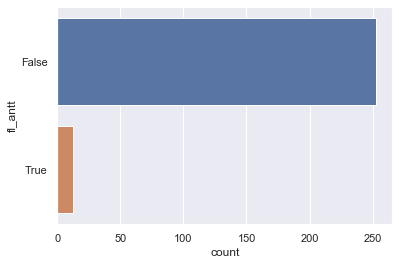

In [7]:
# Check for veiculo entries
mask_vehicle = df_port3mrg.columns.str.contains("veiculo")
df_port3mrg.loc[:, mask_vehicle].head()

#Check why ANTT  columns are always empty/null
df_port3mrg["fl_antt"].value_counts()
sns.countplot(y="fl_antt", data = df_port3mrg)

mask = df_port3mrg.columns.str.contains("antt")
df_port3mrg.loc[df_port3mrg.fl_antt, mask].head(10)

#all entries still null

,fl_veiculo,vl_total_veiculos_antt,vl_total_veiculos_leves,vl_total_veiculos_pesados,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,vl_total_veiculos_antt_grupo,vl_potenc_cons_oleo_gas
175,False,NaN,NaN,NaN,0.0,0.0,NaN,45.0
202,False,NaN,NaN,NaN,0.0,0.0,NaN,45.0


Text(0.5, 1.0, 'Linear Relation between Potential consumption heavy vehicles (Could it be infered later?)')

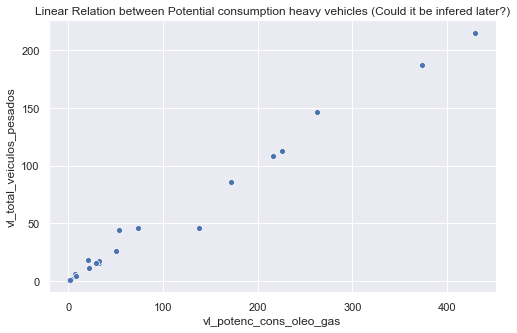

In [8]:
veh_col = df_port3mrg.columns[mask_vehicle].tolist()
veh_col.append("vl_potenc_cons_oleo_gas")

# For some reason it didn't worked by just leaving series with ~ not operator.
df_port3mrg.loc[(~df_port3mrg.vl_potenc_cons_oleo_gas.isna())
                & (df_port3mrg.fl_veiculo == False), veh_col ]

# Not all gas and oil emissions are correlated to having vehicles. Could it be rental?
fig, ax = plt.subplots(1,1, figsize = (8,5))
plt.title("Linear Relation between Potential consumption heavy vehicles (Could it be infered later?)")
sns.scatterplot(x="vl_potenc_cons_oleo_gas", y = "vl_total_veiculos_pesados", data = df_port3mrg)

#Though it is linearly related to heavy vehicles

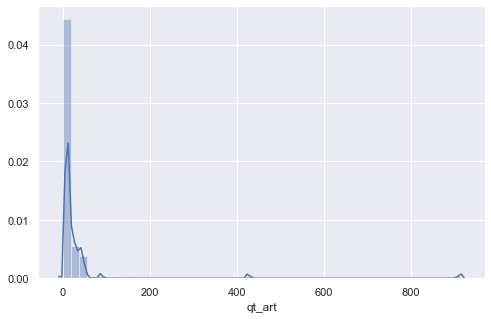

In [9]:

#ART status - only 130 rows filled
fig, ax = plt.subplots(1,1, figsize =(8,5))
sns.distplot(df_port3mrg.qt_art.dropna())


In [10]:
#Telephone Information - Couple nulls here (66~)
df_port3mrg["de_indicador_telefone"].value_counts()

BOA    194
Name: de_indicador_telefone, dtype: int64

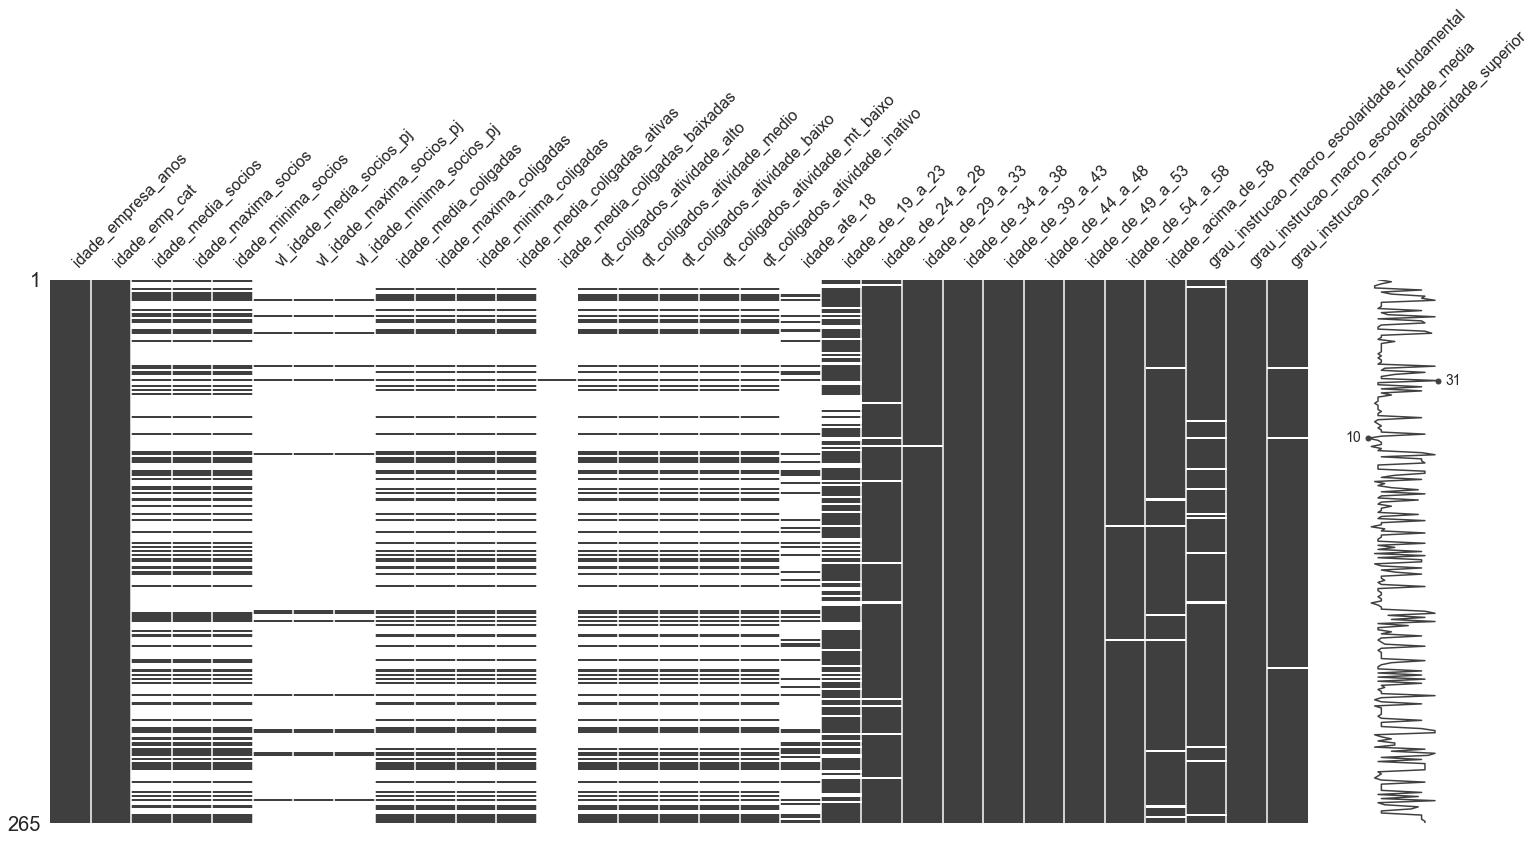

In [11]:
#Age - Check how it is distributed
mask_age = df_port3mrg.columns.str.contains("idade_")

msno.matrix(df_port3mrg.loc[:, mask_age])

,idade_ate_18,idade_de_19_a_23,idade_de_24_a_28,idade_de_29_a_33,idade_de_34_a_38,idade_de_39_a_43,idade_de_44_a_48,idade_de_49_a_53,idade_de_54_a_58,idade_acima_de_58,idade_empresa_anos,idade_emp_cat
0,NaN,NaN,44.0,107.0,162.0,161.0,113.0,69.0,44.0,45.0,21.813699,> 20
1,NaN,1.0,10.0,27.0,30.0,20.0,15.0,11.0,3.0,2.0,16.389041,15 a 20
2,NaN,1.0,7.0,10.0,11.0,12.0,9.0,14.0,33.0,73.0,40.380822,> 20
3,NaN,NaN,NaN,8.0,18.0,29.0,22.0,31.0,29.0,14.0,43.854795,> 20
4,NaN,NaN,6.0,10.0,12.0,45.0,50.0,48.0,34.0,24.0,43.865753,> 20
5,NaN,2.0,9.0,29.0,28.0,26.0,35.0,18.0,10.0,13.0,47.087671,> 20
6,NaN,5.0,15.0,43.0,42.0,29.0,51.0,78.0,139.0,216.0,15.734247,15 a 20
7,NaN,10.0,26.0,34.0,38.0,28.0,18.0,7.0,4.0,3.0,26.520548,> 20
8,5.0,10.0,36.0,40.0,43.0,19.0,11.0,7.0,4.0,6.0,8.446575,5 a 10
9,NaN,23.0,41.0,21.0,26.0,16.0,11.0,7.0,2.0,1.0,11.035616,10 a 15


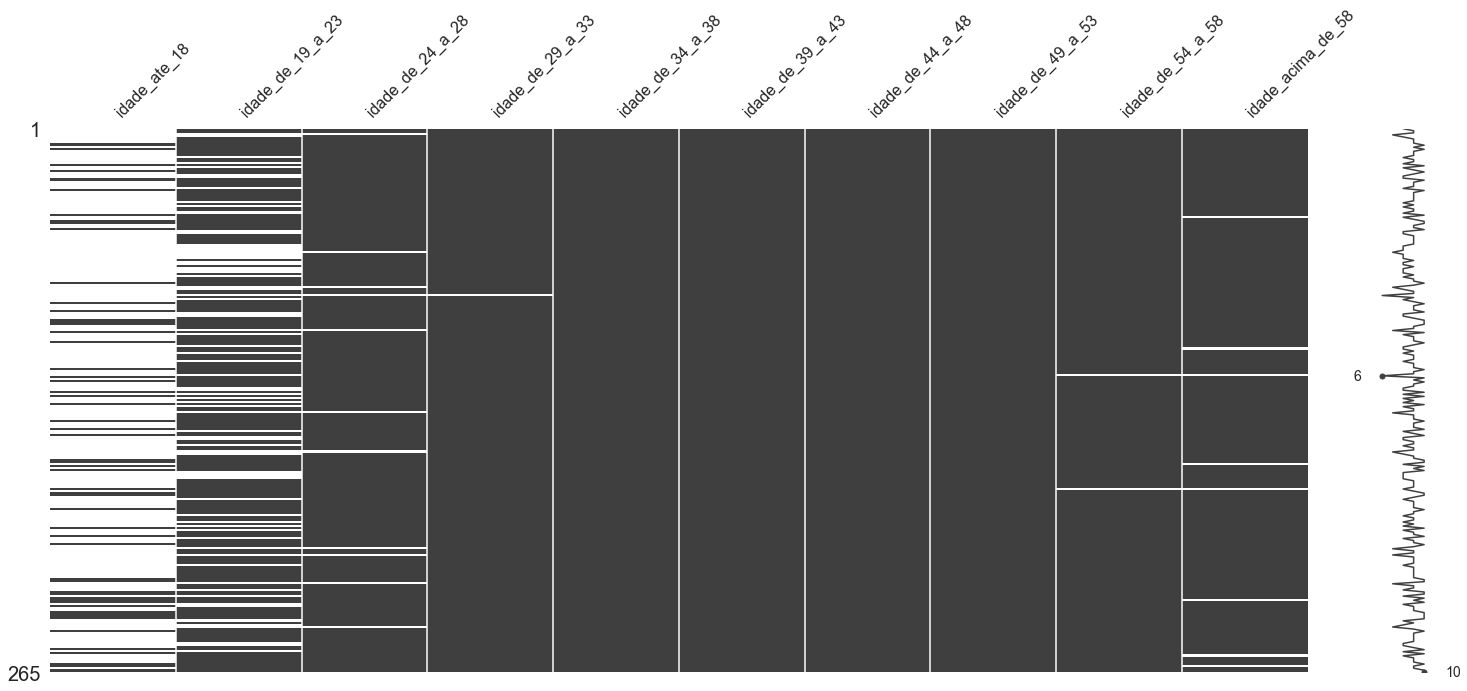

In [12]:
age_list = df_port3mrg.columns[mask_age].tolist()
age_range = age_list[18:-3]
msno.matrix(df_port3mrg.loc[:, age_range])

age_range.extend(["idade_empresa_anos", "idade_emp_cat"])

display(df_port3mrg.loc[:, age_range].head(10))

In [13]:
# df_port3mrg[df_port3mrg.empsetorcensitariofaixarendapopulacao.isna()]


df_meso = df_port3mrg["nm_meso_regiao"].value_counts()

df_port3mrg.groupby("nm_meso_regiao").agg({"empsetorcensitariofaixarendapopulacao": ["mean", "min", "max", "count"]}).join(df_meso)

/Users/naniviaa/miniconda3/envs/squad4/lib/python3.7/site-packages/pandas/core/reshape/merge.py:522: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


,"(empsetorcensitariofaixarendapopulacao, mean)","(empsetorcensitariofaixarendapopulacao, min)","(empsetorcensitariofaixarendapopulacao, max)","(empsetorcensitariofaixarendapopulacao, count)",nm_meso_regiao
nm_meso_regiao,,,,,
AGRESTE POTIGUAR,752.844000,525.46,1309.21,5,8
CENTRAL POTIGUAR,622.610000,385.64,803.85,5,6
CENTRO AMAZONENSE,1986.977187,634.75,6347.86,32,39
CENTRO MARANHENSE,705.105455,339.08,1172.83,11,11
CENTRO NORTE PIAUIENSE,1384.461200,353.66,4438.02,25,31
LESTE MARANHENSE,623.952000,483.75,935.07,5,6
LESTE POTIGUAR,2232.754762,372.23,5261.19,21,23
NORTE AMAZONENSE,1039.450000,1039.45,1039.45,1,1
NORTE MARANHENSE,1920.378649,369.20,5985.49,37,41


# Observations - Null:

### Vehicle:
* Nulls are very likely to be zero;
* If fl_veiculo is False, then all others must be set to false;
* There are only 12 vehicles that are actually licensed to be ANTT certified and all of them have antt vehicle columns as null. Check if there is any misunderstanding with other analysis (Portifolio 2 and 1)
* Heavy vehicles and gas consumption seems extremely correlated. This could be used, if necessary, for later merges between those two variables;

### ART - Anotação de responsabilidade técnica:
* Only 130 filled rows - with couple outliers;

### Telephone Number (Neoway Ref):
* Has 194 records with same row - could be either transformed to a categorical columns and filled other records with "None


### Employees data:
* Illiteracy data - Can be filled with 0 for all cases


### Society  Information
* Should be filled with 0 in case company is a society (anonymous society - SA). Many informations seems really specific 

### Wealthy status for empsetorcensitariofaixarendapopulacao
* Some places are missing - they can be imputed using other data from mesoregions or microregions;

# Exploratory

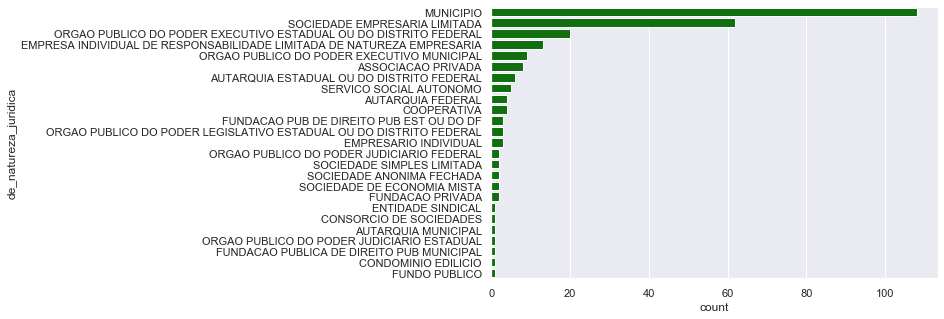

In [14]:
fig, ax = plt.subplots(1,1, figsize = (8,5))

sns.countplot(y="de_natureza_juridica", data =  df_port3mrg, color = "green",
             order=df_port3mrg.de_natureza_juridica.value_counts().index)

MA    74
PI    52
RN    51
AM    43
AC    23
RO    22
Name: sg_uf_matriz, dtype: int64

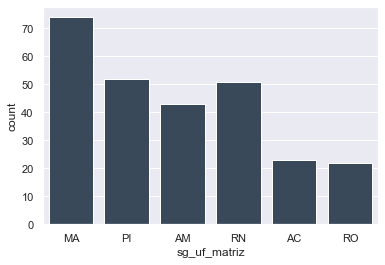

In [15]:
df_port3mrg.sg_uf_matriz.value_counts()
sns.countplot(x = "sg_uf_matriz", data = df_port3mrg, color="#34495e")

In [16]:
df_port3mrg.nm_meso_regiao.value_counts().head(8)

NORTE MARANHENSE          41
CENTRO AMAZONENSE         39
CENTRO NORTE PIAUIENSE    31
LESTE POTIGUAR            23
VALE DO ACRE              21
OESTE POTIGUAR            13
SUDESTE PIAUIENSE         11
CENTRO MARANHENSE         11
Name: nm_meso_regiao, dtype: int64

In [17]:
# Rio Branco, Manaus
df_port3mrg.nm_micro_regiao.value_counts().head(8)

MANAUS                            38
AGLOMERACAO URBANA DE SAO LUIS    32
TERESINA                          21
RIO BRANCO                        19
NATAL                             18
PICOS                              6
PINDARE                            6
MEDIO MEARIM                       6
Name: nm_micro_regiao, dtype: int64

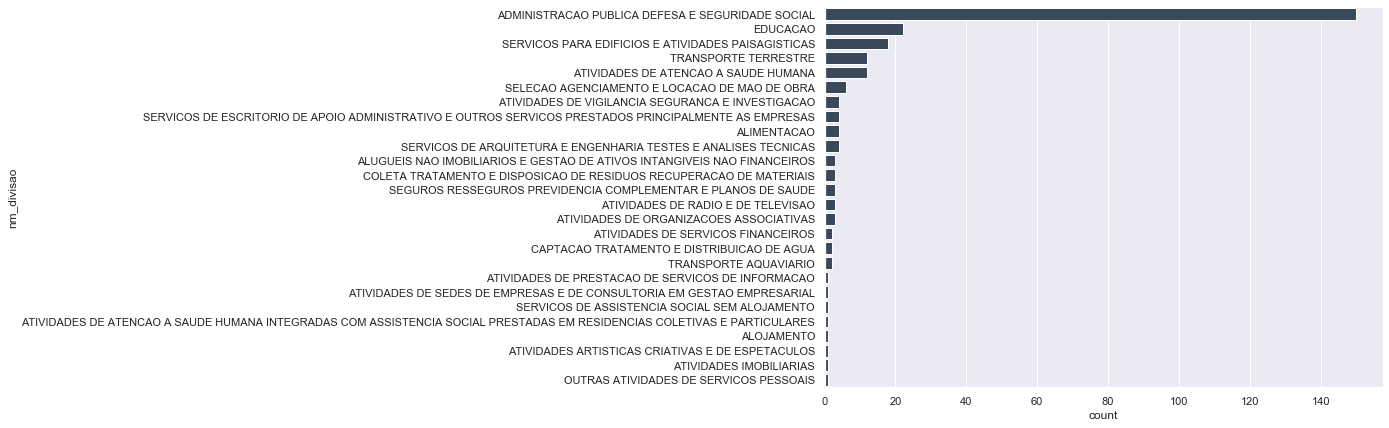

In [18]:
# df_port3mrg.nm_divisao.value_counts()
fig, ax = plt.subplots(1,1, figsize=(10,7))
sns.countplot(y = "nm_divisao", data = df_port3mrg, color="#34495e",
             order= df_port3mrg["nm_divisao"].value_counts().index)

ADMINISTRACAO PUBLICA DEFESA E SEGURIDADE SOCIAL                  150
ATIVIDADES ADMINISTRATIVAS E SERVICOS COMPLEMENTARES               35
EDUCACAO                                                           22
TRANSPORTE ARMAZENAGEM E CORREIO                                   14
SAUDE HUMANA E SERVICOS SOCIAIS                                    14
ATIVIDADES FINANCEIRAS DE SEGUROS E SERVICOS RELACIONADOS           5
AGUA ESGOTO ATIVIDADES DE GESTAO DE RESIDUOS E DESCONTAMINACAO      5
ATIVIDADES PROFISSIONAIS CIENTIFICAS E TECNICAS                     5
ALOJAMENTO E ALIMENTACAO                                            5
OUTRAS ATIVIDADES DE SERVICOS                                       4
INFORMACAO E COMUNICACAO                                            4
ATIVIDADES IMOBILIARIAS                                             1
ARTES CULTURA ESPORTE E RECREACAO                                   1
Name: nm_segmento, dtype: int64

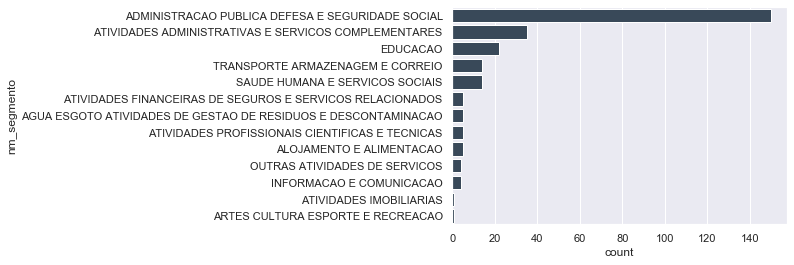

In [19]:
#Which segments this base corresponds to?
df_port3mrg.nm_segmento.value_counts()
sns.countplot(y = "nm_segmento", data = df_port3mrg, color="#34495e",
             order= df_port3mrg["nm_segmento"].value_counts().index)

In [20]:
#Both segments and divisions are close - but divisions seems to be a bit more broad.
# How many cases with less than 5 entries (division)

print("Total # of divisions")
print(df_port3mrg.nm_divisao.nunique())
print("Less than 5 entries")
(df_port3mrg.nm_divisao.value_counts().sort_values() < 5).sum()

#Out of 26 divisions, 20 of them have less than 

Total # of divisions
26
Less than 5 entries


20

de_saude_tributaria  de_saude_rescencia
AZUL                 ACIMA DE 1 ANO         83
CINZA                SEM INFORMACAO          1
LARANJA              ACIMA DE 1 ANO         20
VERDE                ACIMA DE 1 ANO        158
                     ATE 1 ANO               1
VERMELHO             ACIMA DE 1 ANO          2
Name: id, dtype: int64

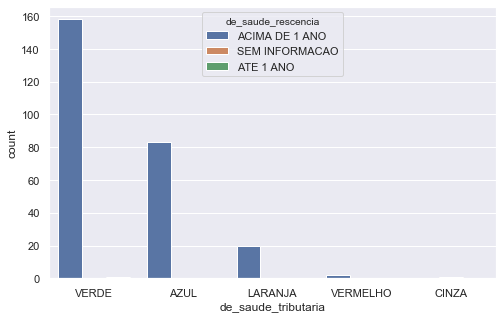

In [21]:
# Check for Health Tax
mask = df_port3mrg.columns.str.contains("saude")
# df_port3mrg.loc[:, mask]

fig, ax = plt.subplots(1,1, figsize= (8,5))
sns.countplot(x = "de_saude_tributaria", hue="de_saude_rescencia", data = df_port3mrg)
#seems to be a very little amount of "No information" and "Less than 1 year" for this set - but how much?

display(df_port3mrg.groupby(["de_saude_tributaria", "de_saude_rescencia"]).id.count())
#No information  -  1 Register / More than 1 year - 1 Register

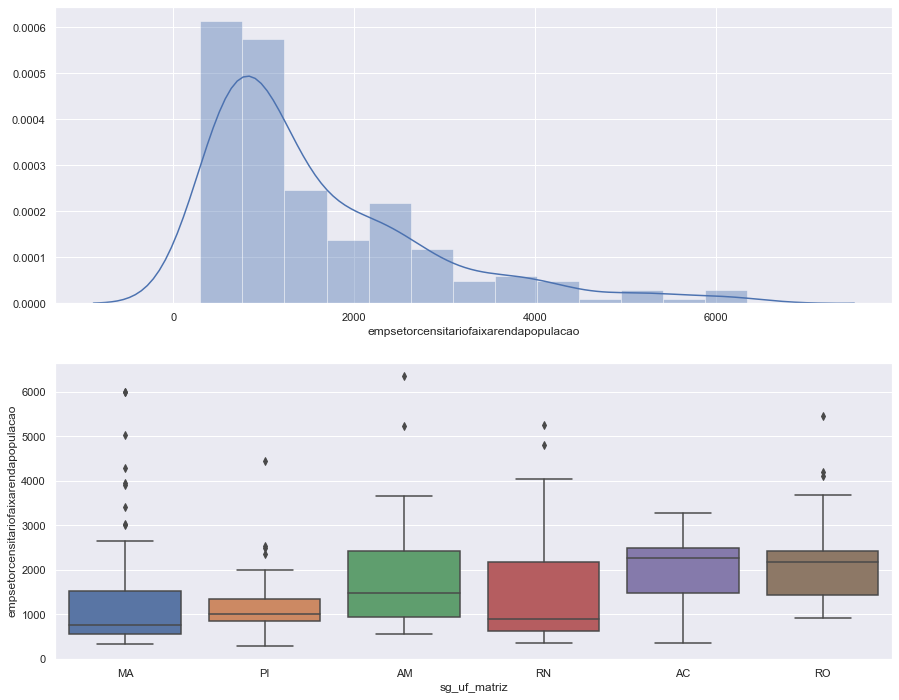

In [22]:
fig, ax = plt.subplots(2,1, figsize=(15,12))
sns.distplot(df_port3mrg.empsetorcensitariofaixarendapopulacao.dropna(), ax= ax[0])
sns.boxplot(x= "sg_uf_matriz", y="empsetorcensitariofaixarendapopulacao", data = df_port3mrg, ax=ax[1])

In [23]:
# df_port3mrg[df_port3mrg.empsetorcensitariofaixarendapopulacao.isna()]


df_meso = df_port3mrg["nm_meso_regiao"].value_counts()

df_port3mrg.groupby("nm_meso_regiao").agg({"empsetorcensitariofaixarendapopulacao": ["mean", "min", "max", "count"]}).join(df_meso)

/Users/naniviaa/miniconda3/envs/squad4/lib/python3.7/site-packages/pandas/core/reshape/merge.py:522: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


,"(empsetorcensitariofaixarendapopulacao, mean)","(empsetorcensitariofaixarendapopulacao, min)","(empsetorcensitariofaixarendapopulacao, max)","(empsetorcensitariofaixarendapopulacao, count)",nm_meso_regiao
nm_meso_regiao,,,,,
AGRESTE POTIGUAR,752.844000,525.46,1309.21,5,8
CENTRAL POTIGUAR,622.610000,385.64,803.85,5,6
CENTRO AMAZONENSE,1986.977187,634.75,6347.86,32,39
CENTRO MARANHENSE,705.105455,339.08,1172.83,11,11
CENTRO NORTE PIAUIENSE,1384.461200,353.66,4438.02,25,31
LESTE MARANHENSE,623.952000,483.75,935.07,5,6
LESTE POTIGUAR,2232.754762,372.23,5261.19,21,23
NORTE AMAZONENSE,1039.450000,1039.45,1039.45,1,1
NORTE MARANHENSE,1920.378649,369.20,5985.49,37,41


## Exploratory:

### Origin/Nature:
* Public takes over the majority of types of companies; It is important to translate that in a country with a quite big state such as Brazil, public service is widely know for high stability and long term operations (even if they don't scale with profitability)
* Most of the portifolio consists of municipal nature;

### Location:
* Portifolio 3 only comprehends states from Brazil's north (AM, AC, RO) and northeast region (RN, PI, MA)
* Meso Region can be used/transformed to indicate whether the company belongs/is located in a metropolitan/capital area (since Brazil's capitals are well knew for being significantly more developed than the rest of the state). As it can be seem for Manaus Industrial Zone and Sao Luis zone;
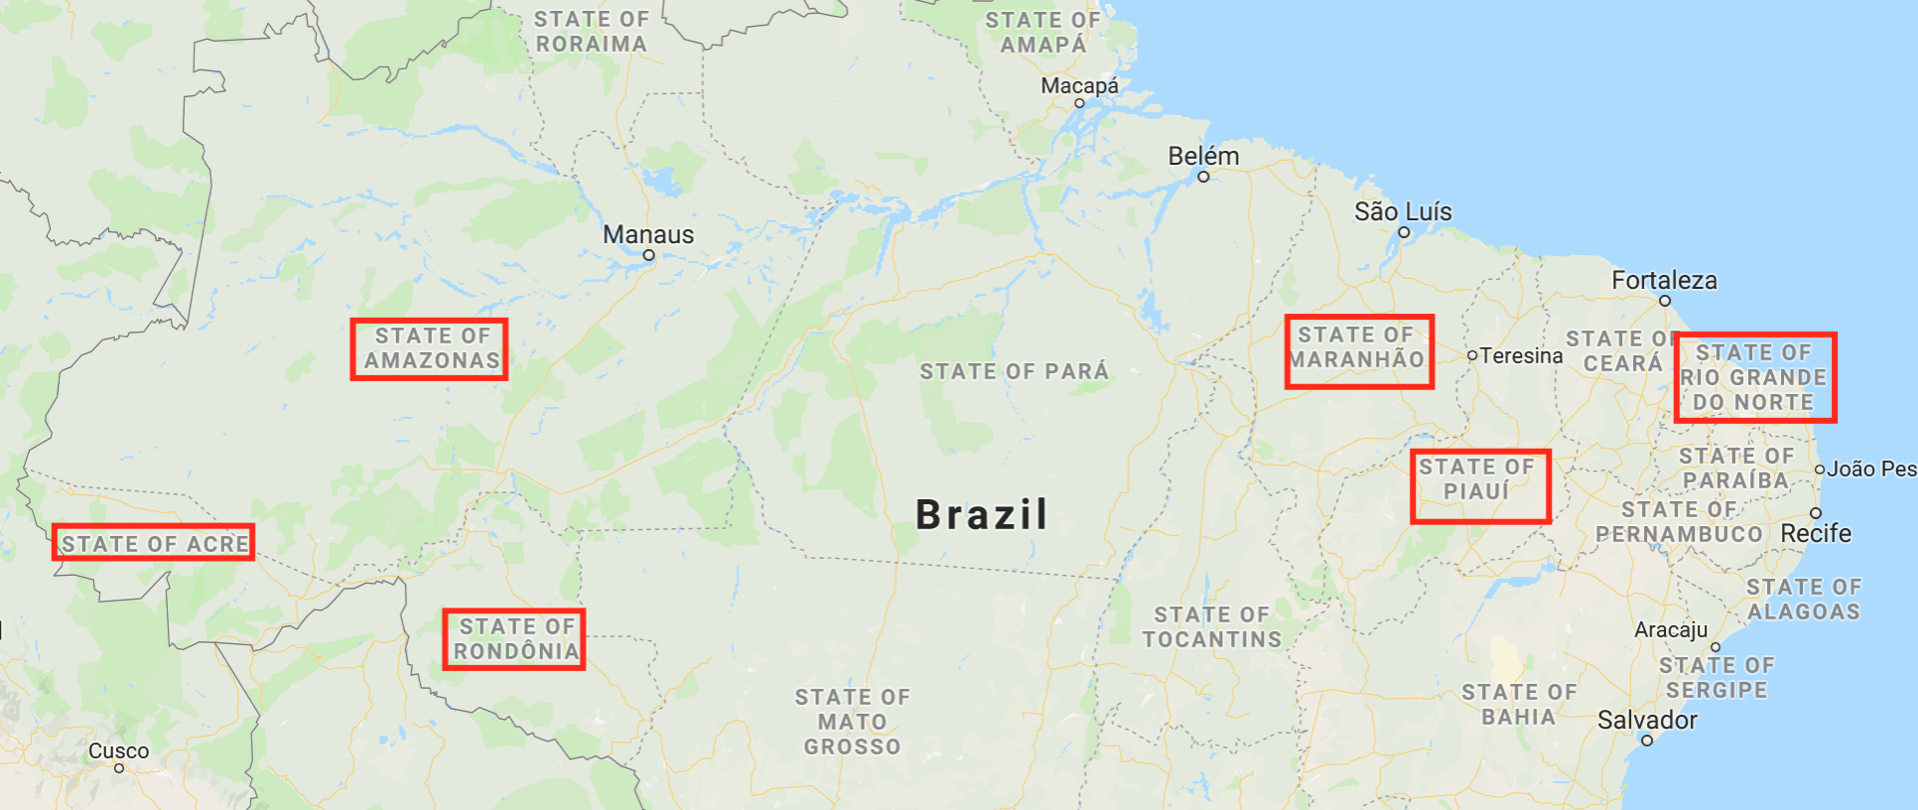

### Financial/Tax Health:
* Seems mostly ok (blue and green);
* Very few bad cases (orange through grey)
* Recency health seems majorly imbalanced towards "More than a year" - Discarding this column should be a good approach


### Gas Consumption/emission and Heavy Vehicles:
* **vl_potenc_cons_oleo_gas**, potential consumption of oil and gas can be linearly correlated to the amount of heavy vehicles in the fleet


### Employees Age:
* Should be treated differently - perharps investing in core variables that translate how old the company instead of having random integers throw into a model might be a better idea (quantil values for less redudancy)

### Average wealth - region wise
* Interesting point: It is possible to imput data through other columns and groups (meso and micro regions).
* This can offer a general insight regarding the overall wealthiness and value of business;